## Title & Objective
# TCS Stock Data Analysis and Prediction
> **Author:** Veer  
 **Role:** Data Analyst & Data scientist   
 **Tools:** Python, ML (Machine Learning)  
 **Libraries:** NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, Statsmodels, Warnings  
 **Objective:** Analyze the historical data of TCS stock to gain insights into stock behavior, identify
trends, and forecast future stock prices.  

## Index / Table of Contents
### Notebook Index
1. Import Libraries
2. Load Dataset
3. Data Structure
4. Data Cleaning & Preprocessing
5. Exploratory Data Analysis (EDA)
   - Visualize TCS Stock Close Price Data  
7. Model Building
8. Model Evaluation
9. Forecasting Using ARIMA Model
    - Testing For Stationarity
    - Differencing
    - Autocorrelation & Partial Autocorrelation
10. Evaluation of ARIMA Model
11. Key Insights

## Import Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
# importing the dataset
stock_data = pd.read_csv("TCS_stock_history.csv")
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


## Data Structure

In [4]:
# checking shape of the data
stock_data.shape

(4463, 8)

- Here we have 4463 rows and 8 columns.

In [6]:
# summary of the data
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [7]:
# checking data types
stock_data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [8]:
# checking statistical summary of data
stock_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


## Data Cleaning

In [10]:
# looking for duplicate values in dataset
stock_data.duplicated().sum()

0

In [11]:
# looking for null values in dataset
stock_data.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [12]:
# convert to datetime format
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
# sort by date
stock_data.sort_values(by = "Date", inplace = True)

In [13]:
# verifying data tyeps
stock_data.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [14]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


## EDA (Exploratory Data Analysis)

In [16]:
print(stock_data["Date"].min(),stock_data["Date"].max())

2002-08-12 00:00:00 2021-09-30 00:00:00


- We have dataset from 12-08-2002 to 30-09-2021

In [18]:
# splitting year and month from date column
stock_data["Year"] = stock_data["Date"].dt.year
stock_data["Month"] = stock_data["Date"].dt.month

In [19]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,2002,8
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,2002,8
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,2002,8
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,2002,8
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,2002,8


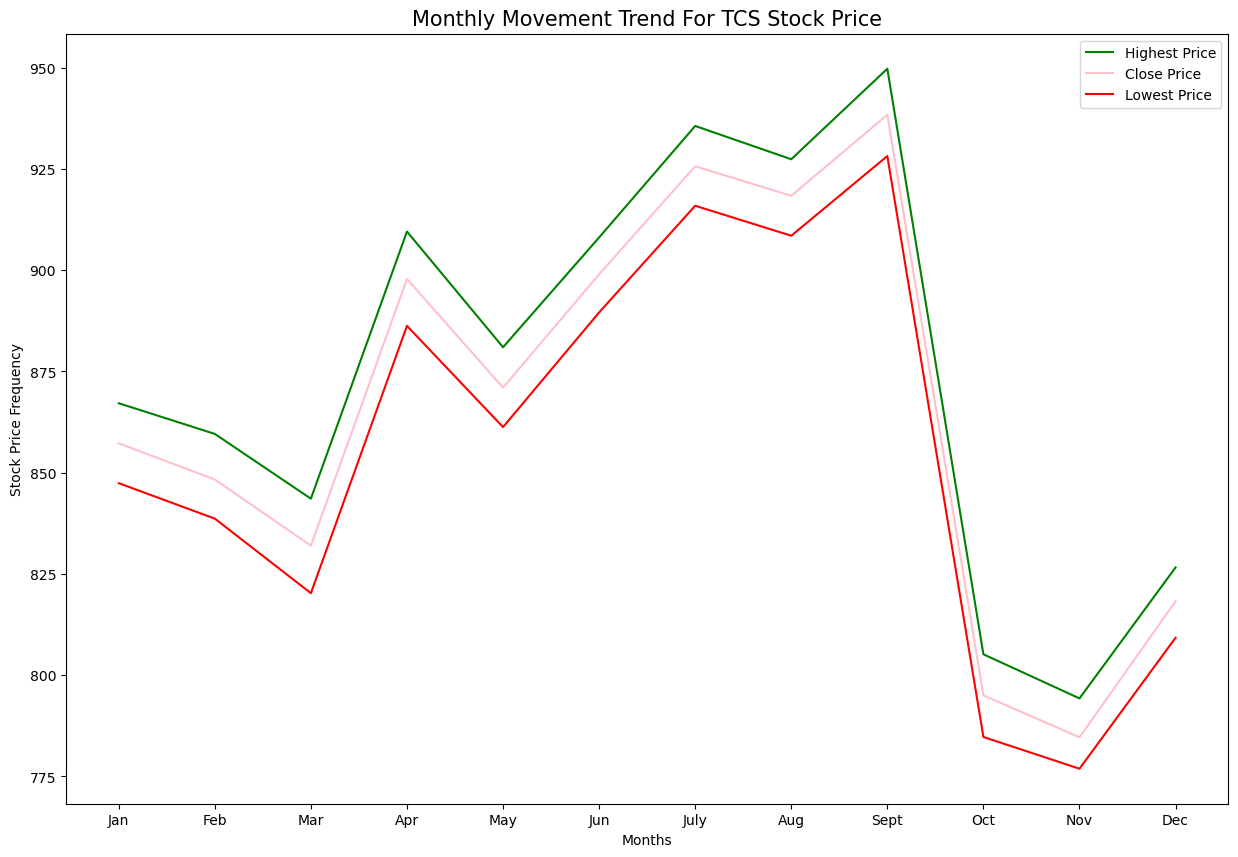

In [20]:
# plotting monthly trend line
plt.figure(figsize = (15,10))
sns.lineplot(x = stock_data["Month"], y = stock_data["High"],label = "Highest Price",color = "green",errorbar = None)
sns.lineplot(x = stock_data["Month"], y = stock_data["Close"],label = "Close Price",color = "pink",errorbar = None)
sns.lineplot(x = stock_data["Month"], y = stock_data["Low"],label = "Lowest Price",color = "red",errorbar = None)
plt.title("Monthly Movement Trend For TCS Stock Price",fontsize = 15)
plt.xticks(range(1,13),["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sept","Oct","Nov","Dec"])
plt.xlabel("Months")
plt.ylabel("Stock Price Frequency")
plt.show()

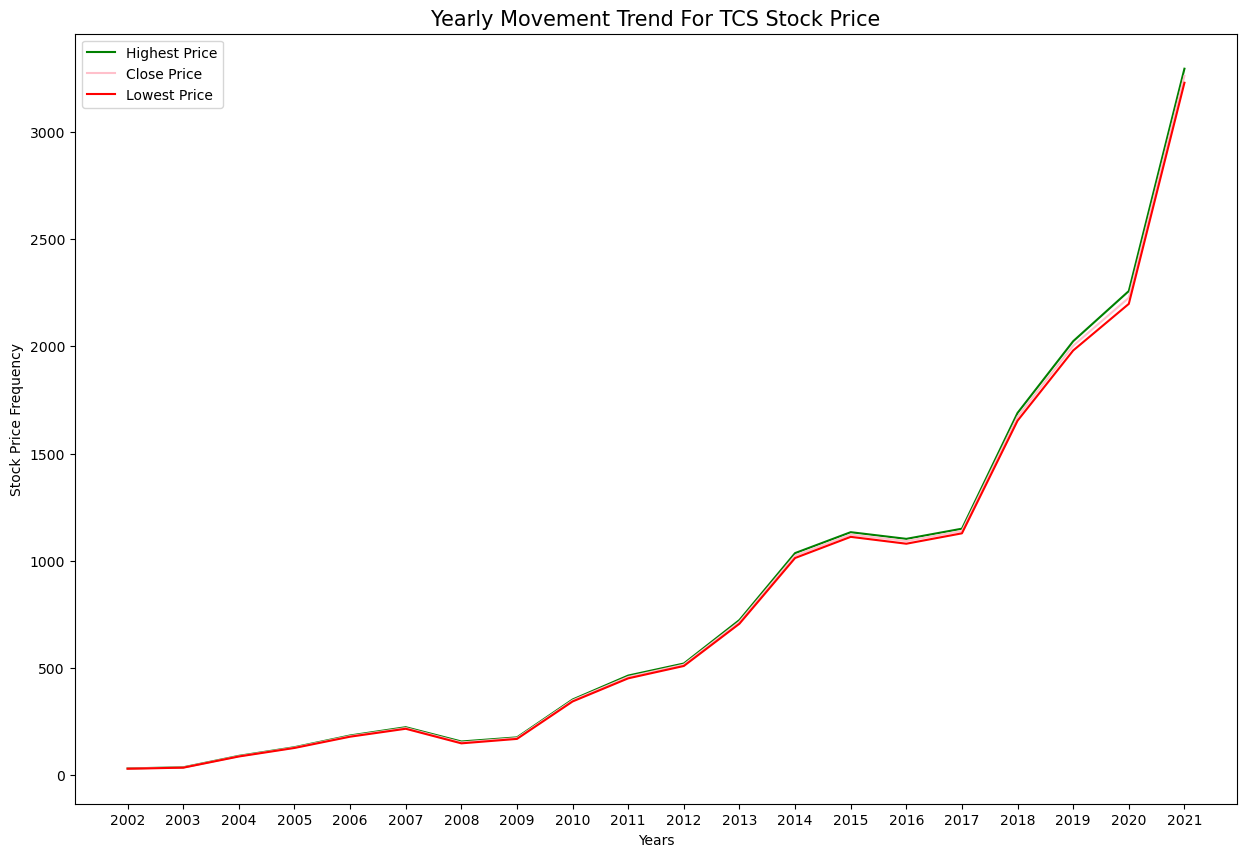

In [21]:
# plotting yearly trend line
plt.figure(figsize = (15,10))
sns.lineplot(x = stock_data["Year"], y = stock_data["High"],label = "Highest Price",color = "green",errorbar = None)
sns.lineplot(x = stock_data["Year"], y = stock_data["Close"],label = "Close Price",color = "pink",errorbar = None)
sns.lineplot(x = stock_data["Year"], y = stock_data["Low"],label = "Lowest Price",color = "red",errorbar = None)
plt.title("Yearly Movement Trend For TCS Stock Price",fontsize = 15)
plt.xlabel("Years")
plt.xticks(stock_data["Year"].unique())
plt.ylabel("Stock Price Frequency")
plt.show()

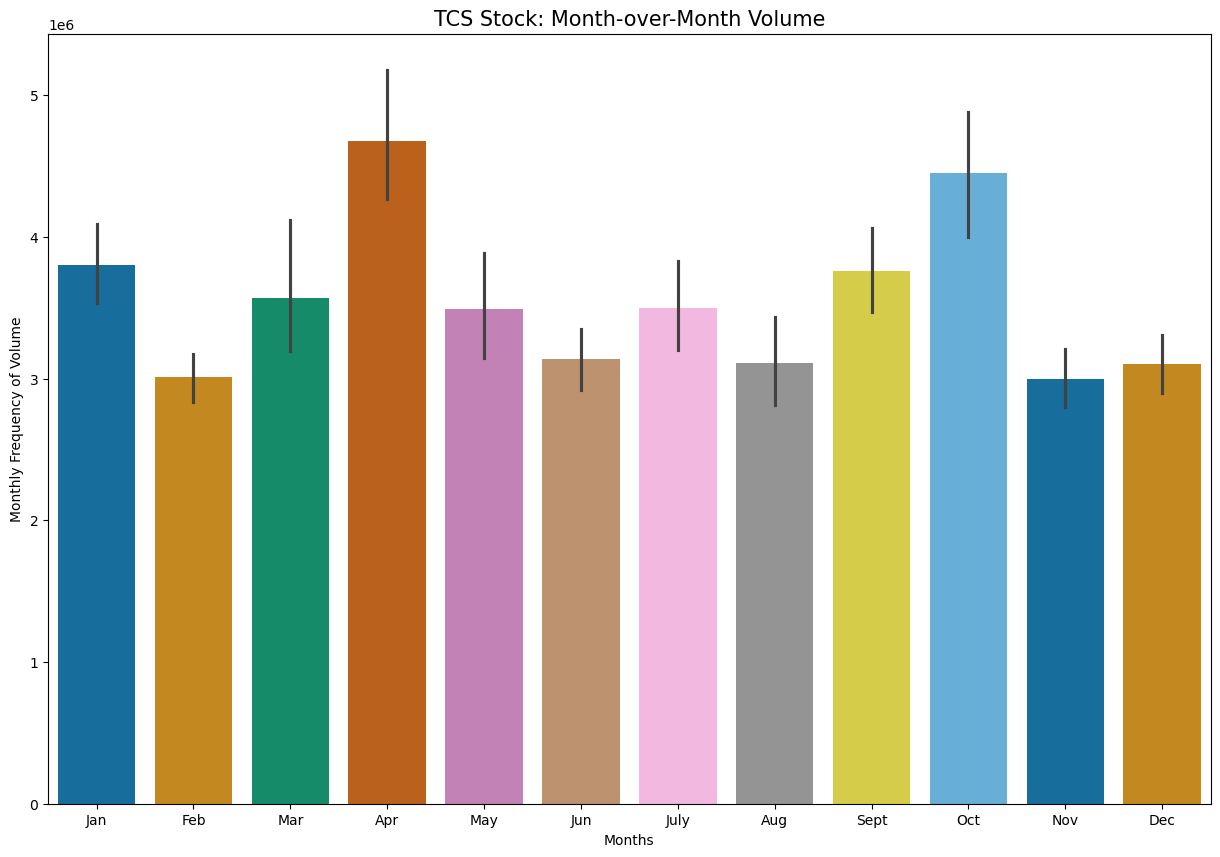

In [22]:
# plotting monthly volume treded over the time
plt.figure(figsize = (15,10))
sns.barplot(x = stock_data["Month"], y = stock_data["Volume"], palette = "colorblind")
plt.title("TCS Stock: Month-over-Month Volume", fontsize = 15)
plt.xlabel("Months")
plt.xticks(range(0,12),["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sept","Oct","Nov","Dec"])
plt.ylabel("Monthly Frequency of Volume")
plt.show()

- Highest volume traded in a month of april and october.
- Lowest volume traded in a month of february and november.

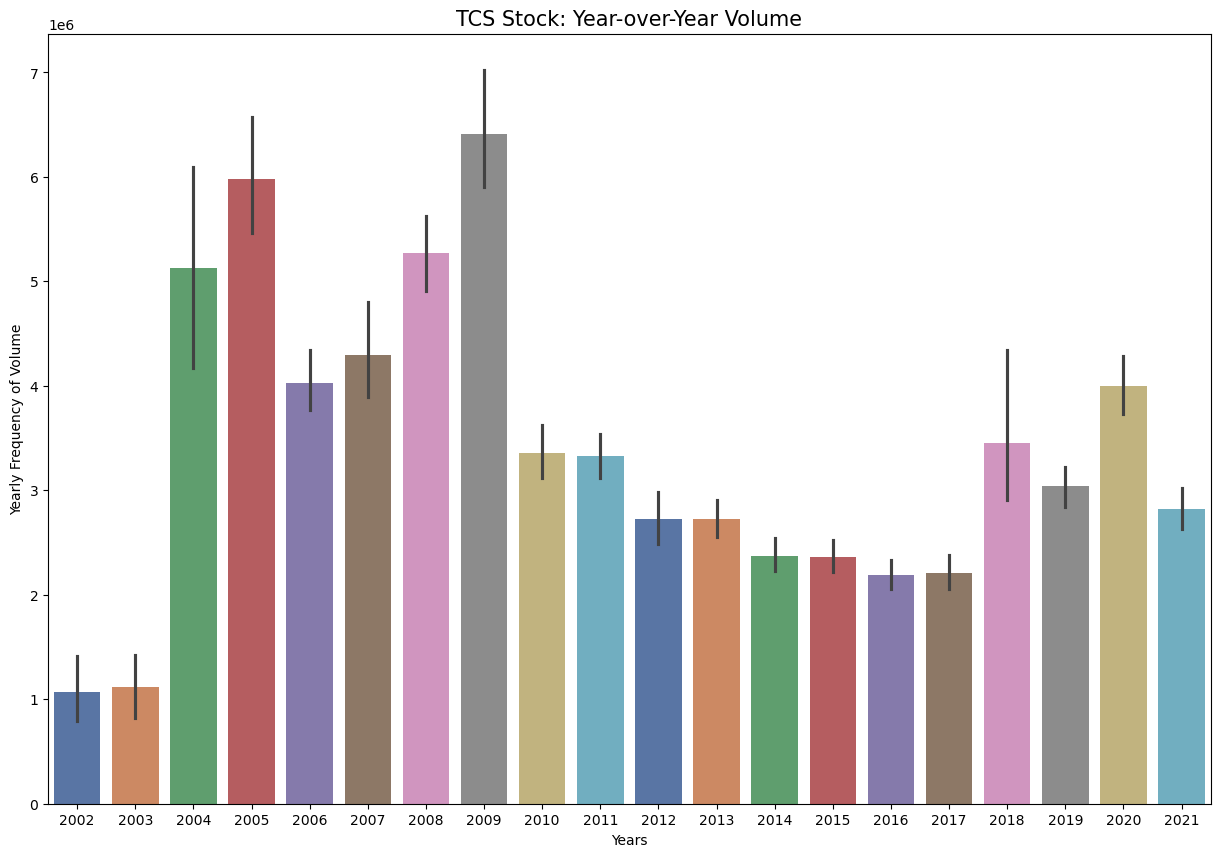

In [24]:
# plotting yearly volume treded over the time
plt.figure(figsize = (15,10))
sns.barplot(x = stock_data["Year"],y = stock_data["Volume"], palette = "deep")
plt.title("TCS Stock: Year-over-Year Volume", fontsize = 15)
plt.xlabel("Years")
plt.ylabel("Yearly Frequency of Volume")
plt.show()

- Highest volume traded in a year of 2009, 2005 and 2008.
- Lowest volume traded in a year of 2002, 2003, 2016 and 2017.
- Major jump comes in after the year of 2003.

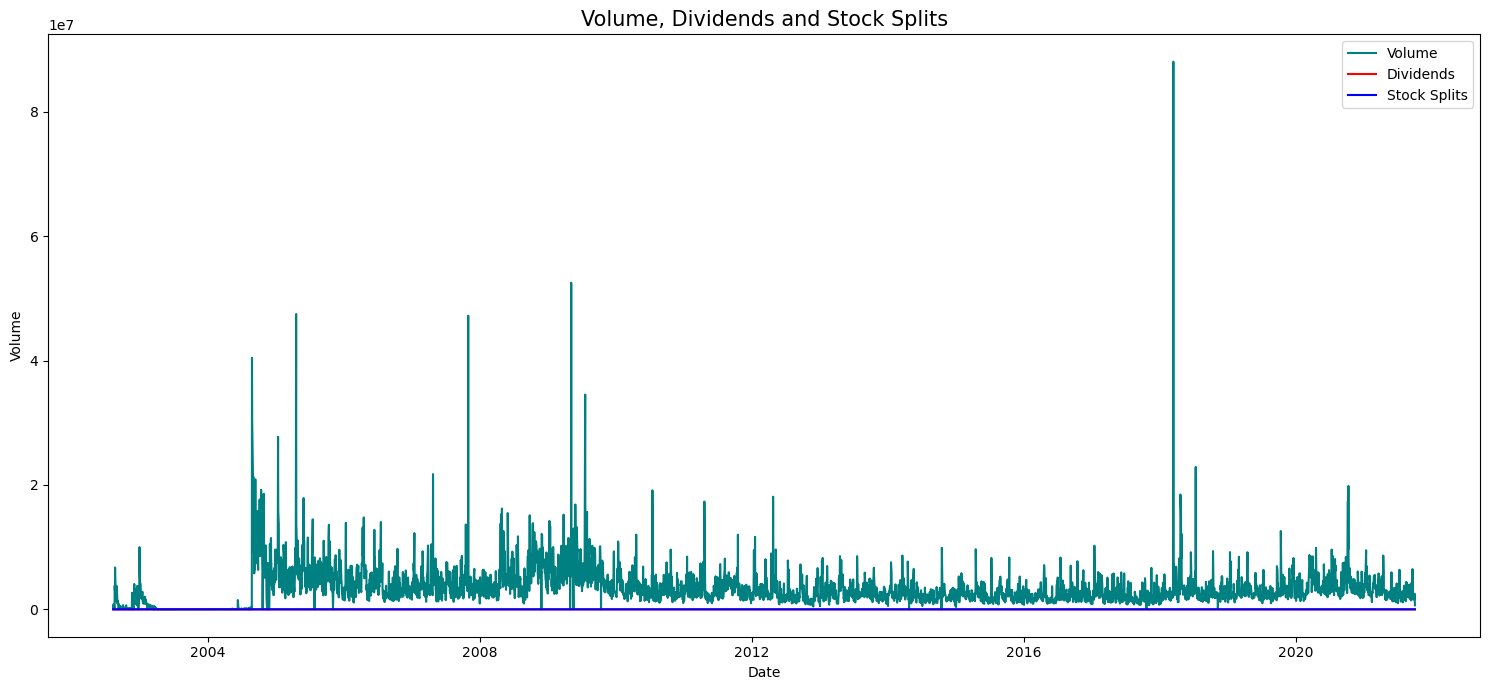

In [26]:
# plotting volume,dividends and stock splits
plt.figure(figsize = (15,7))
sns.lineplot(x = stock_data["Date"], y = stock_data["Volume"], label = "Volume",c = "teal")
sns.lineplot(x = stock_data["Date"], y = stock_data["Dividends"], label = "Dividends",c = "red")
sns.lineplot(x = stock_data["Date"], y = stock_data["Stock Splits"], label = "Stock Splits",c = "blue")
plt.title("Volume, Dividends and Stock Splits", fontsize = 15)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

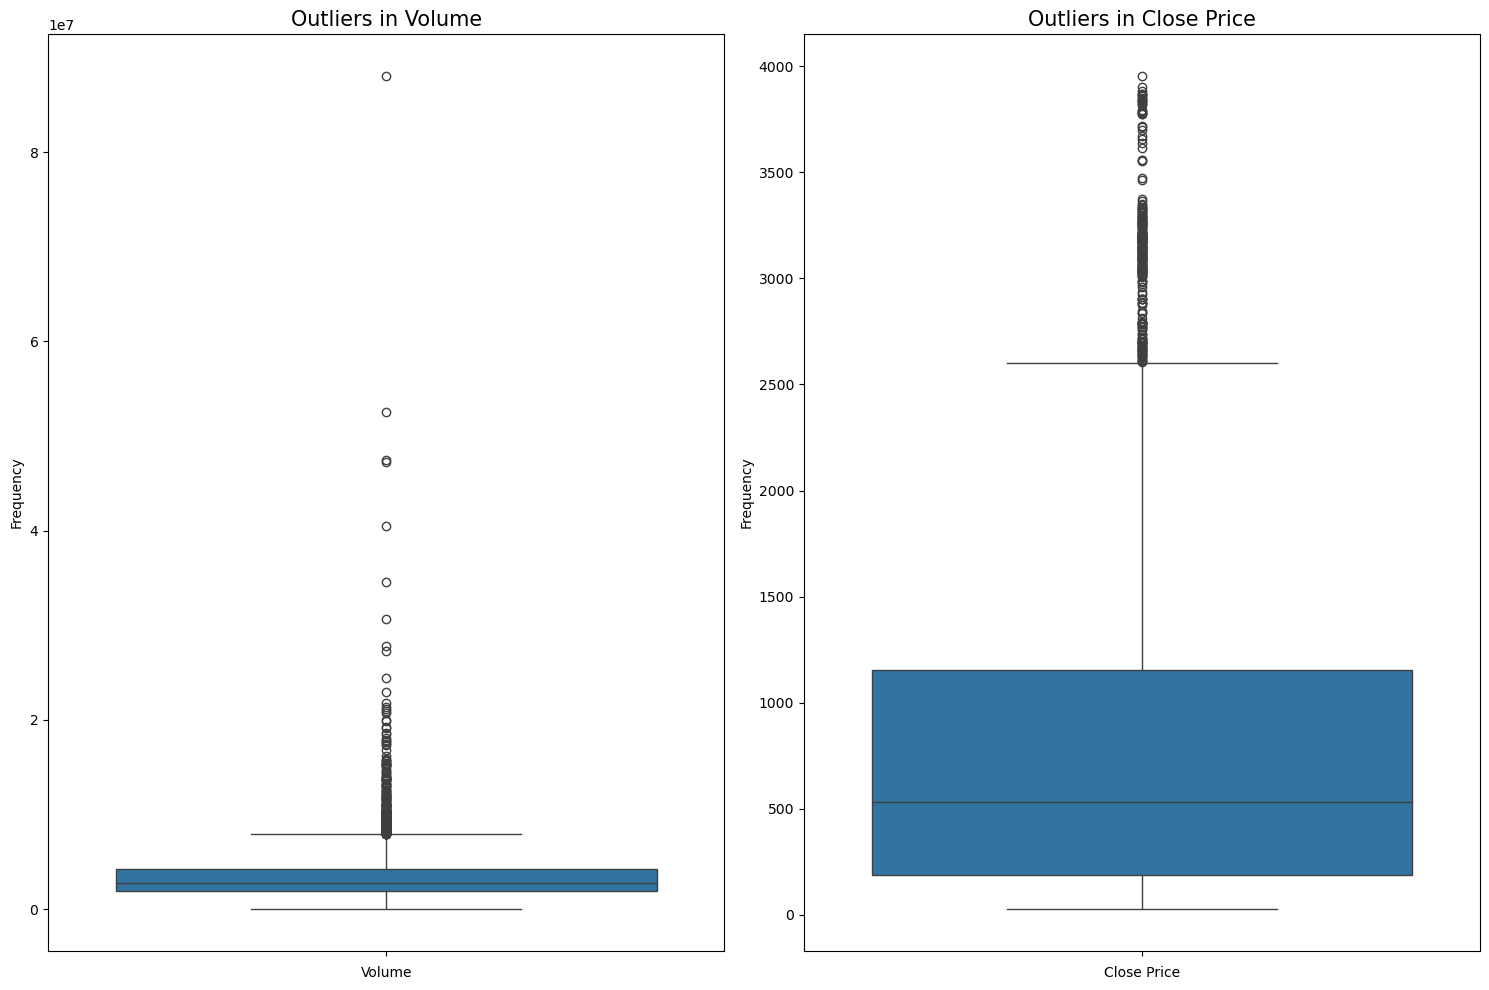

In [27]:
# plotting outliers in closing price and volume
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.boxplot(stock_data["Volume"])
plt.title("Outliers in Volume", fontsize = 15)
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.tight_layout()

plt.subplot(1,2,2)
sns.boxplot(stock_data["Close"])
plt.title("Outliers in Close Price", fontsize = 15)
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

- There are lots of outliers in volume and closing price.

## Visualize TCS Stock Close Price Data  

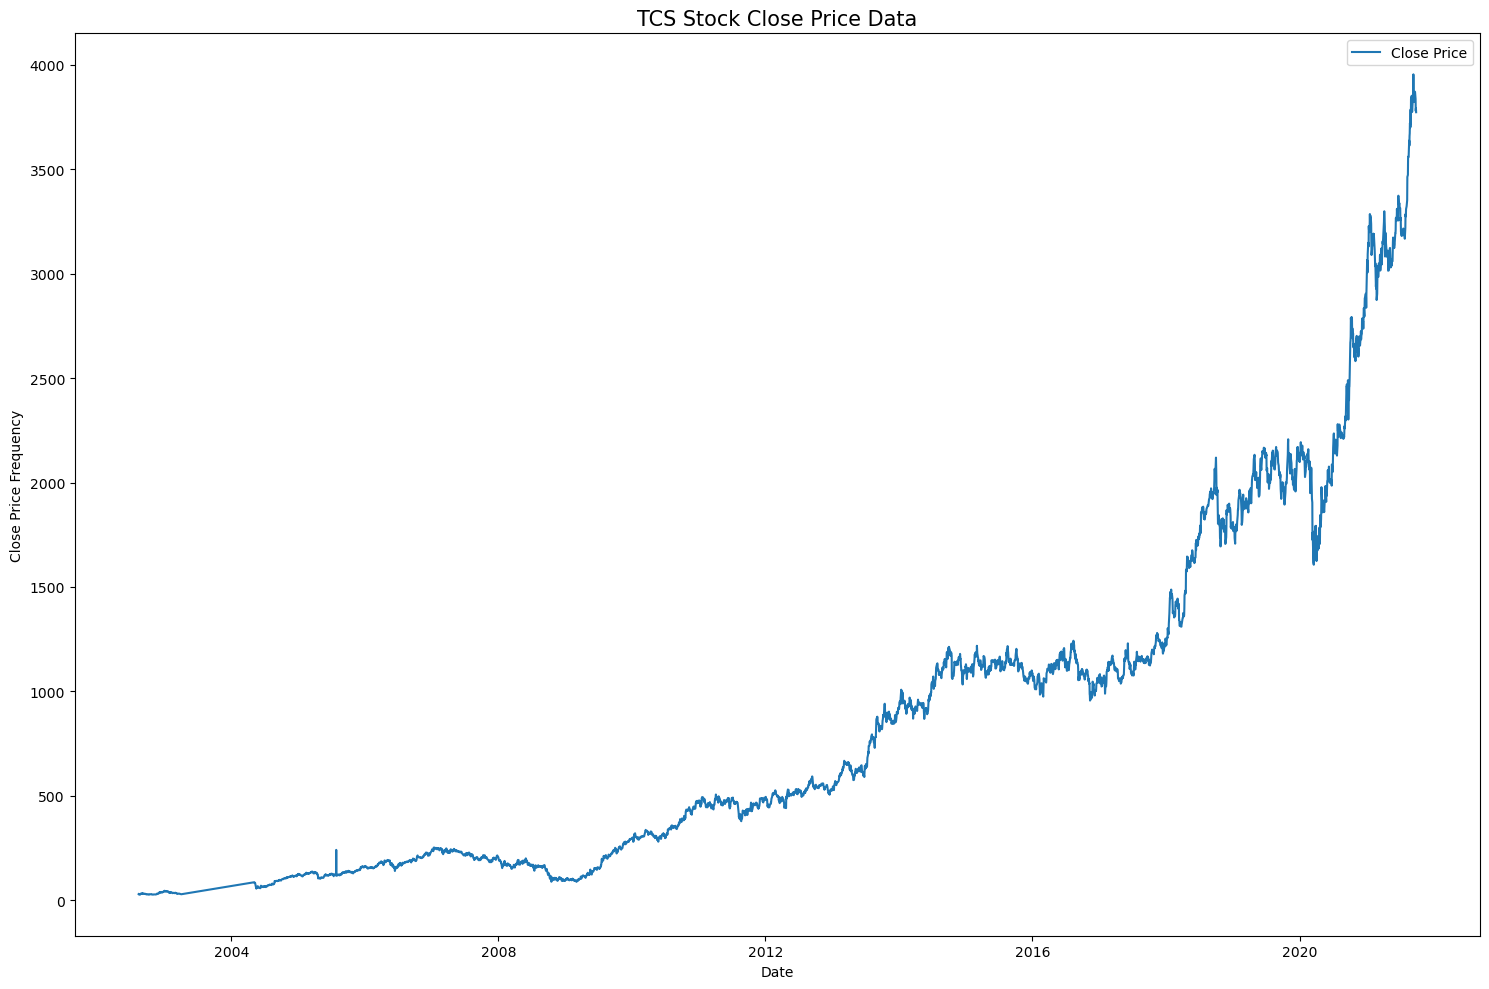

In [30]:
# plotting TCS stock close price : 2002 to 2021
plt.figure(figsize = (15,10))
sns.lineplot(x = stock_data["Date"], y = stock_data["Close"],label = "Close Price")
plt.title("TCS Stock Close Price Data", fontsize = 15) 
plt.xlabel("Date")
plt.ylabel("Close Price Frequency")
plt.tight_layout()
plt.show()

- TCS stock close price trend line from from 2002 to 2021.

In [32]:
# finding 30 days moving average for closeing price 
stock_data["30-Days Moving Avg"] = stock_data["Close"].rolling(window = 30).mean()

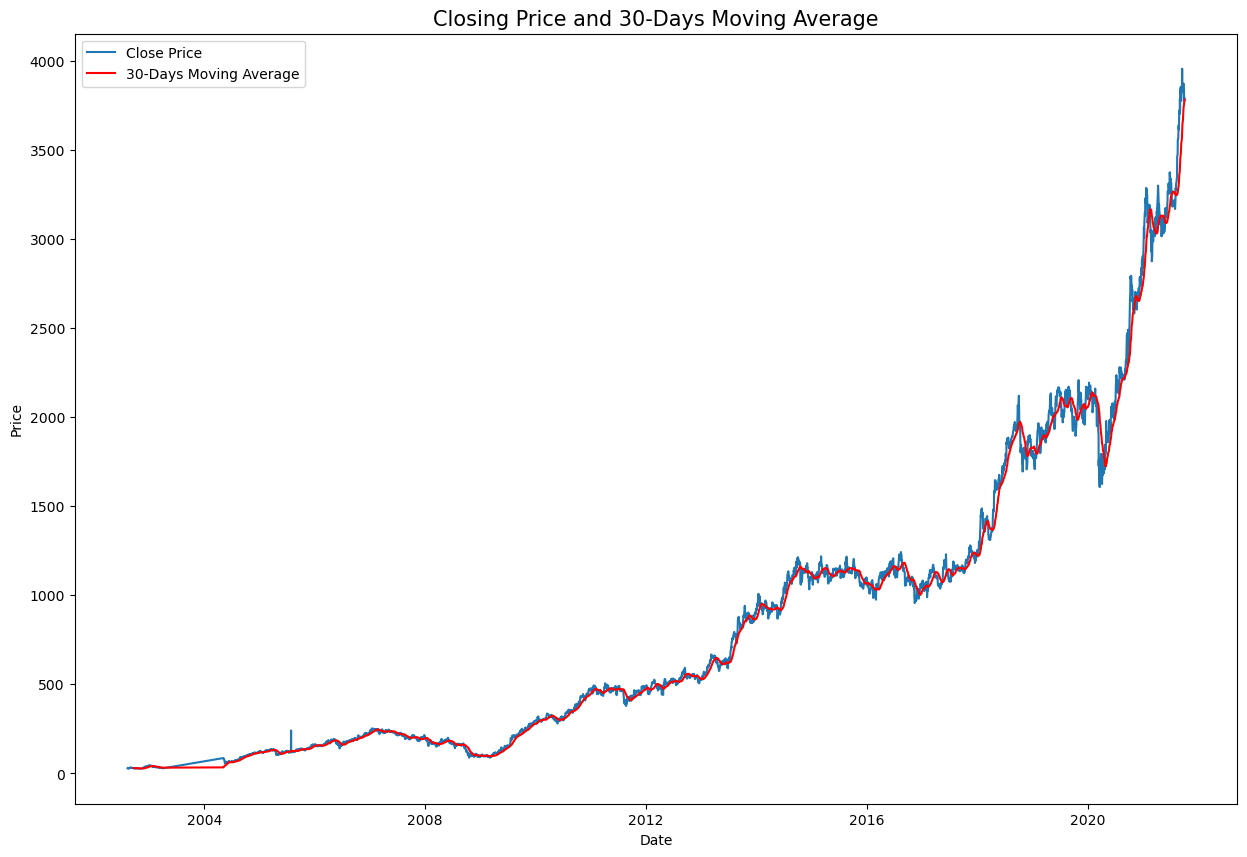

In [33]:
# plotting close price and their moving average for 30 days
plt.figure(figsize = (15,10))
sns.lineplot(x = stock_data["Date"], y = stock_data["Close"], label = "Close Price")
sns.lineplot(x = stock_data["Date"], y = stock_data["30-Days Moving Avg"], label = "30-Days Moving Average",c = "r")
plt.title("Closing Price and 30-Days Moving Average", fontsize = 15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

- Analyze closing price and taking 30 days moving average of it.

In [35]:
# figuring out short-term moving average and long-term moving average
# for short-term we took 5 days window ; for long-term we took 30 days window
stock_data["ST_MA"] = stock_data["Close"].rolling(window = 5).mean()
stock_data["LT_MA"] = stock_data["Close"].rolling(window = 30).mean()
# trading signal based on moving average cross over 
stock_data["Signal"] = np.where(stock_data["ST_MA"] > stock_data["LT_MA"],1,-1)

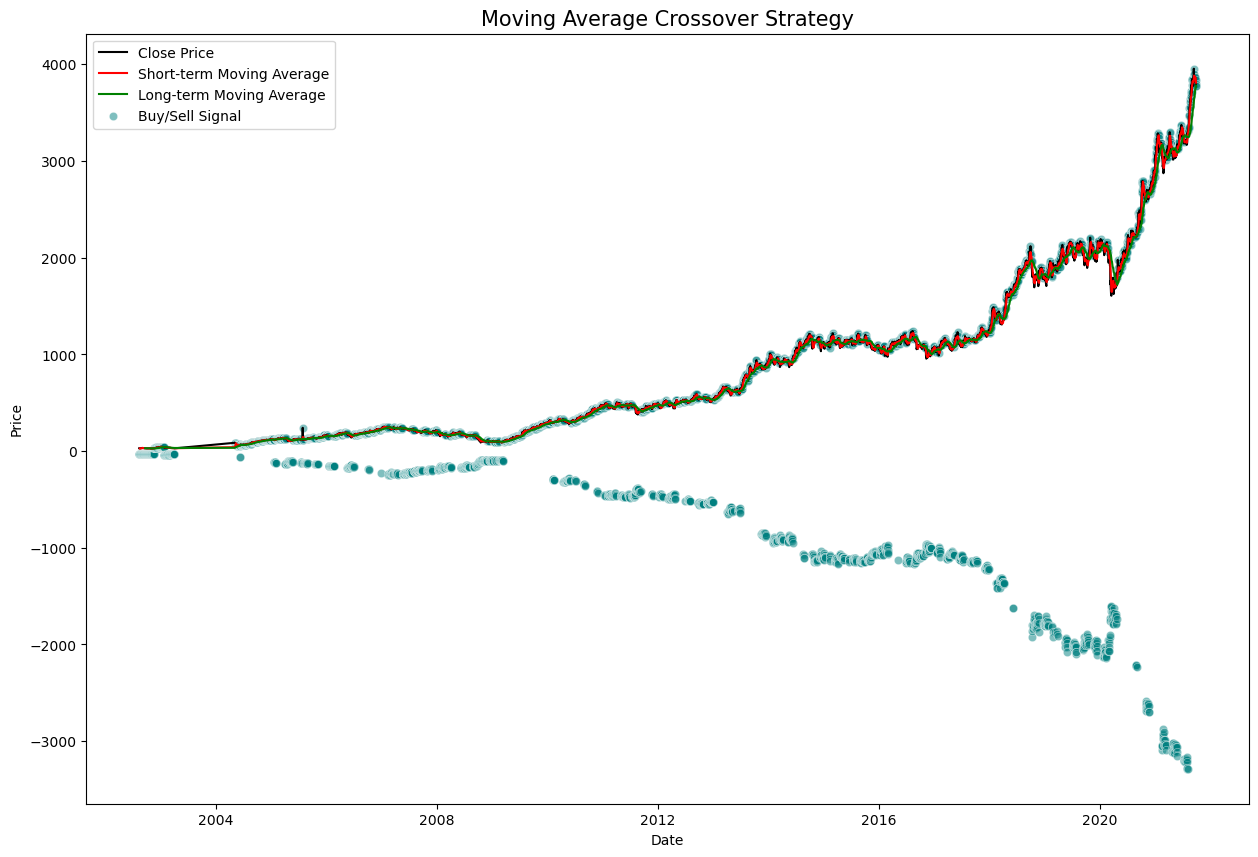

In [36]:
# plotting moving average crossover strategy
plt.figure(figsize = (15,10))
sns.lineplot(x = stock_data["Date"], y = stock_data["Close"], label = "Close Price",c = "black")
sns.lineplot(x = stock_data["Date"], y = stock_data["ST_MA"], label = "Short-term Moving Average",c = "r")
sns.lineplot(x = stock_data["Date"], y = stock_data["LT_MA"], label = "Long-term Moving Average",c = "g")
sns.scatterplot(x = stock_data["Date"], y = stock_data["Signal"] * stock_data["Close"],
                label = "Buy/Sell Signal", alpha = 0.5, c = "teal")
plt.title("Moving Average Crossover Strategy", fontsize = 15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

- **Moving average crossover stragegy for close price:**
    -  Analyze short-term (5 Days Interval) and long-term (30 Days Interval) moving average for closing price
    - Also, indicating signal for buying and selling with the help of crossover stragegy

In [38]:
# daily price precentage change 
stock_data["DailyPrice_Percentage_Change"] = stock_data["Close"].pct_change() * 100

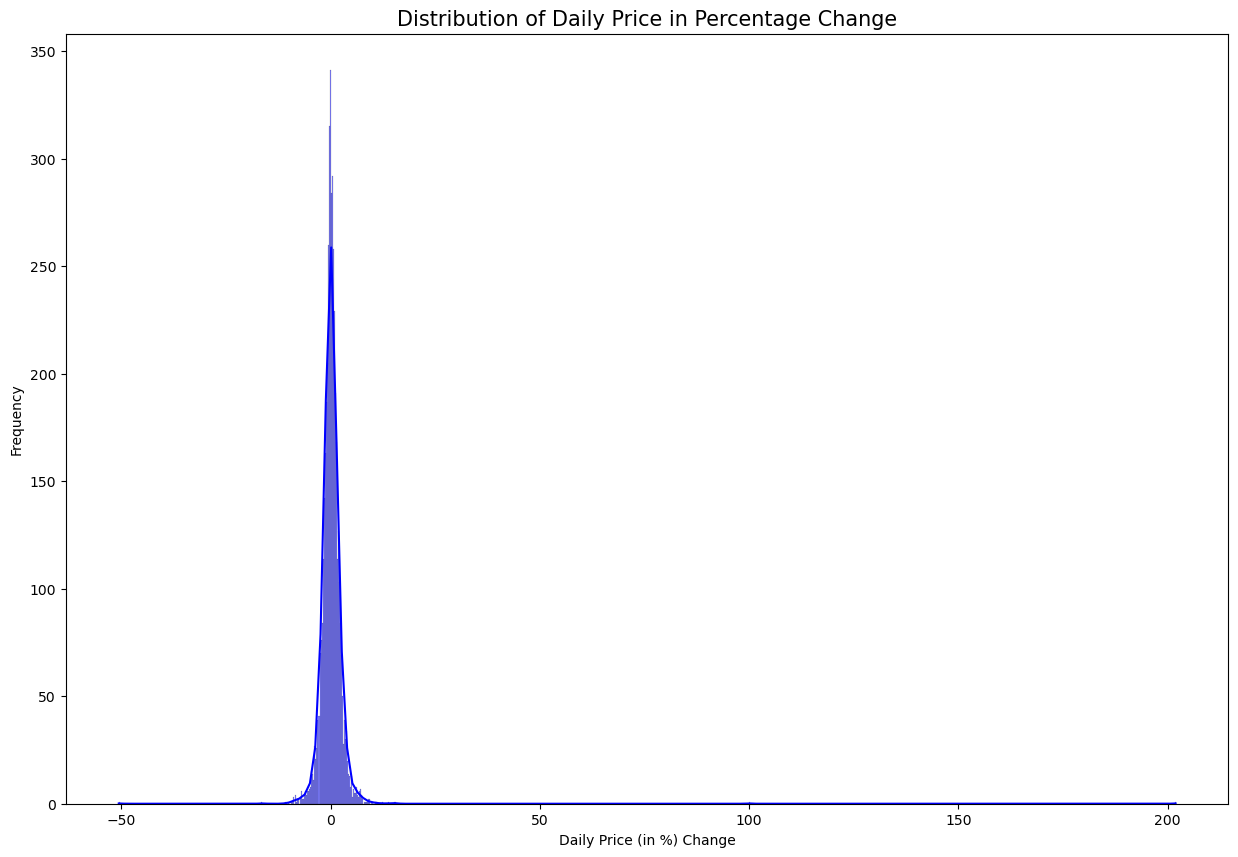

In [39]:
# plotting daily price in percentage change
plt.figure(figsize = (15,10))
sns.histplot(stock_data["DailyPrice_Percentage_Change"], kde = True, color = "blue")
plt.title("Distribution of Daily Price in Percentage Change", fontsize = 15)
plt.xlabel("Daily Price (in %) Change")
plt.ylabel("Frequency")
plt.show()

- The stock is mostly stable on regular days but has some extreme price movements

## Modeling
#### Linear Regression 

In [42]:
# assigning feature and target variables
feature_variable = stock_data[['Open', 'High', 'Low', 'Volume','ST_MA', 'LT_MA','DailyPrice_Percentage_Change']]
target_variable = stock_data["Close"]

In [43]:
X = feature_variable.fillna(0)     # (Independent)
y = target_variable                # (Dependent)

# splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [44]:
# apply model ; linear regression 
lr = LinearRegression()

# fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# predicting the testing data
y_pred_lr = lr.predict(X_test)

## Evaluation For Linear Regression

In [47]:
# Evaluate
print(f"R-square: {r2_score(y_test,y_pred_lr)}")
print(f"MSE : {mean_squared_error(y_test,y_pred_lr)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred_lr))}")
print(f"MAE : {mean_absolute_error(y_test,y_pred_lr)}")

R-square: 0.9994140853429669
MSE : 208.0817557778392
RMSE : 14.425039195019167
MAE : 10.396250403249063


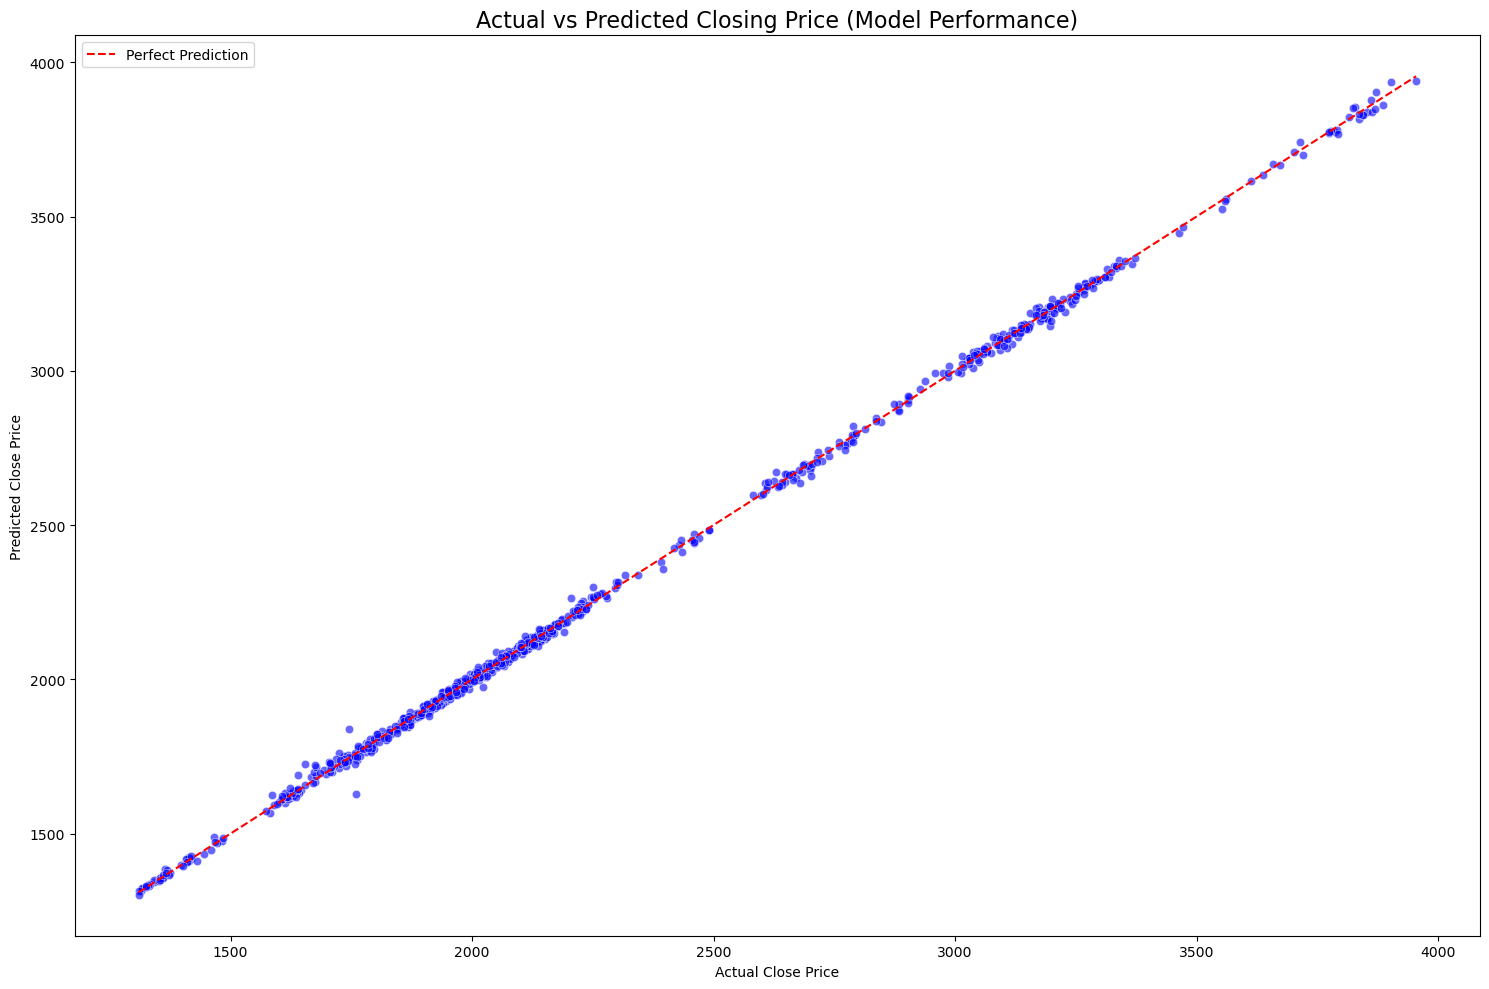

In [48]:
# plotting actual v/s prdicted closing price 
plt.figure(figsize = (15,10))
sns.scatterplot(x = y_test, y = y_pred_lr, color = "blue",  alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color = "red", linestyle = "--", label = "Perfect Prediction")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Closing Price (Model Performance)",fontsize = 16)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

- Here we have preformed linear regression model for predicting closing price of TCS stock data.
- We got $R^2$ value : 99% , it's very strong model for predicting closing price.
- Also we've got root mean squared error (RMSE): 14.42, mean squared error (MSE): 208.08, mean absolute error (MAE): 10.39
- Above scatter-line plot indicates it has strongly positive correlation between actual and predicted closing price.  

## Forecasting For Closing Price Using ARIMA

#### Testing For Stationarity

In [52]:
result = adfuller(stock_data["Close"])
result

(4.790100304780396,
 1.0,
 31,
 4431,
 {'1%': -3.4318266626845793,
  '5%': -2.8621925067885026,
  '10%': -2.5671173333203963},
 38534.80009157404)

In [53]:
# H0 : It is Non-Stationary Data
# H1 : It is Stationary Data

def adfuller_test(close_price):
 result = adfuller(close_price)
 labels = ["ADF Test Statistic", "P-Value", "Legs Used", "Number of Observation Used"]
 for value,label in zip(result,labels):
     print(f"{label} : {value}")
 if result[1] > 0.05:
     print("H0 is Accepted, It's Non-Stationary Data")
 else:
     print("H0 is Rejected, It's Stationary Data")

In [54]:
adfuller_test(stock_data["Close"])

ADF Test Statistic : 4.790100304780396
P-Value : 1.0
Legs Used : 31
Number of Observation Used : 4431
H0 is Accepted, It's Non-Stationary Data


#### Differencing

In [56]:
forecast_data = pd.DataFrame(data = stock_data["Close"]).set_index(stock_data["Date"])
forecast_data.head()

,Close
Date,
2002-08-12,29.519140
2002-08-13,29.119476
2002-08-14,27.111877
2002-08-15,27.111877
2002-08-16,27.046812


In [57]:
forecast_data["Close Price First Difference"] = forecast_data["Close"] - forecast_data["Close"].shift(1)

In [58]:
forecast_data

,Close,Close Price First Difference
Date,,
2002-08-12,29.519140,NaN
2002-08-13,29.119476,-0.399664
2002-08-14,27.111877,-2.007599
2002-08-15,27.111877,0.000000
2002-08-16,27.046812,-0.065065
...,...,...
2021-09-24,3871.300049,2.050049
2021-09-27,3836.949951,-34.350098
2021-09-28,3779.149902,-57.800049


In [59]:
# Again testing dickey fuller test
adfuller_test(forecast_data["Close Price First Difference"].dropna())

ADF Test Statistic : -14.006077356109238
P-Value : 3.786204068039946e-26
Legs Used : 32
Number of Observation Used : 4429
H0 is Rejected, It's Stationary Data


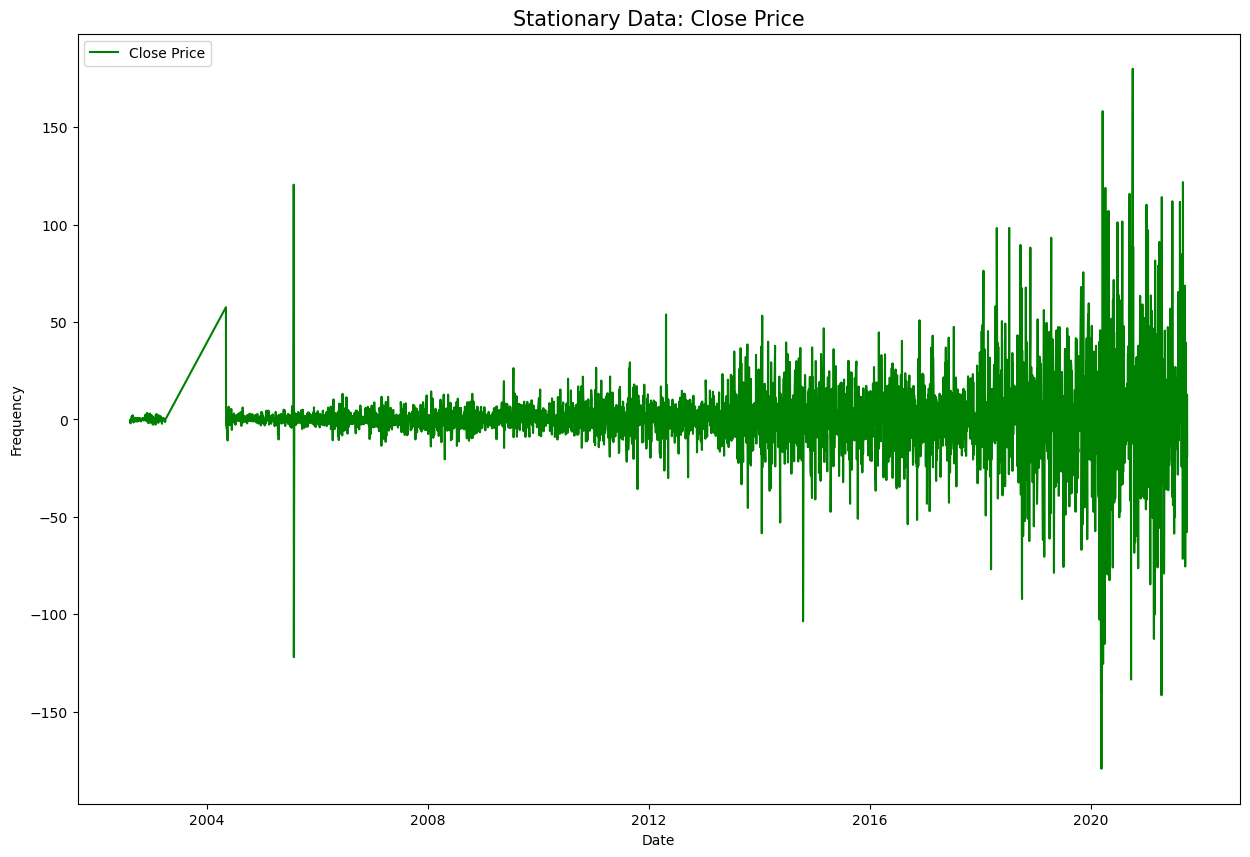

In [60]:
# Plotting stationary data
plt.figure(figsize = (15,10))
plt.plot(forecast_data["Close Price First Difference"], label = "Close Price", color = "green")
plt.title("Stationary Data: Close Price", fontsize = 15)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend(loc = "upper left")
plt.show() 

### Autocorrelation and Partial Autocorrelation

- Identification of an AR model is often best done with the PACF.
- Identification of an MA model is often best done with the ACF rather than the PACF.
- ``order``: p,d,q
    - p : AR Model Legs (Autoregrassive)
    - d : Differencing/Integration (Integrated)
    - q : MA Model Legs (Moving Average)

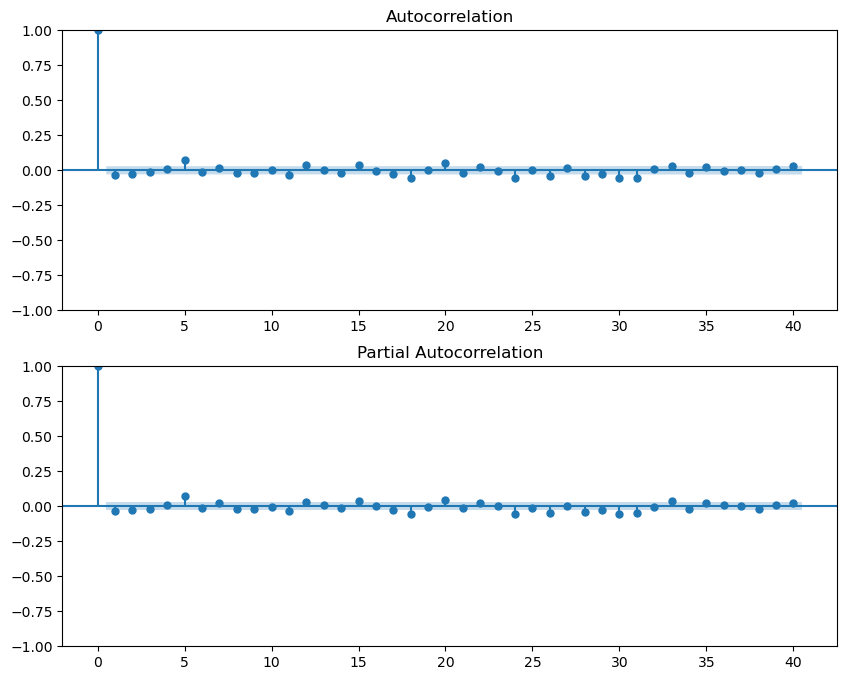

In [63]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(forecast_data["Close Price First Difference"].iloc[1:], lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(forecast_data["Close Price First Difference"].iloc[1:], lags = 40,ax = ax2)


#### Forecast

In [65]:
# Fitting ARIMA model for forecast 
model = ARIMA(forecast_data["Close"], order = (1,1,1))
model_fit = model.fit()

In [66]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4463
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19446.111
Date:                Wed, 12 Nov 2025   AIC                          38898.222
Time:                        13:30:41   BIC                          38917.432
Sample:                             0   HQIC                         38904.994
                               - 4463                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3440      0.159      2.162      0.031       0.032       0.656
ma.L1         -0.3779      0.157     -2.404      0.016      -0.686      -0.070
sigma2       357.2524      2.600    137.402      0.000     352.156     362.348
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             42441.32
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              26.33   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

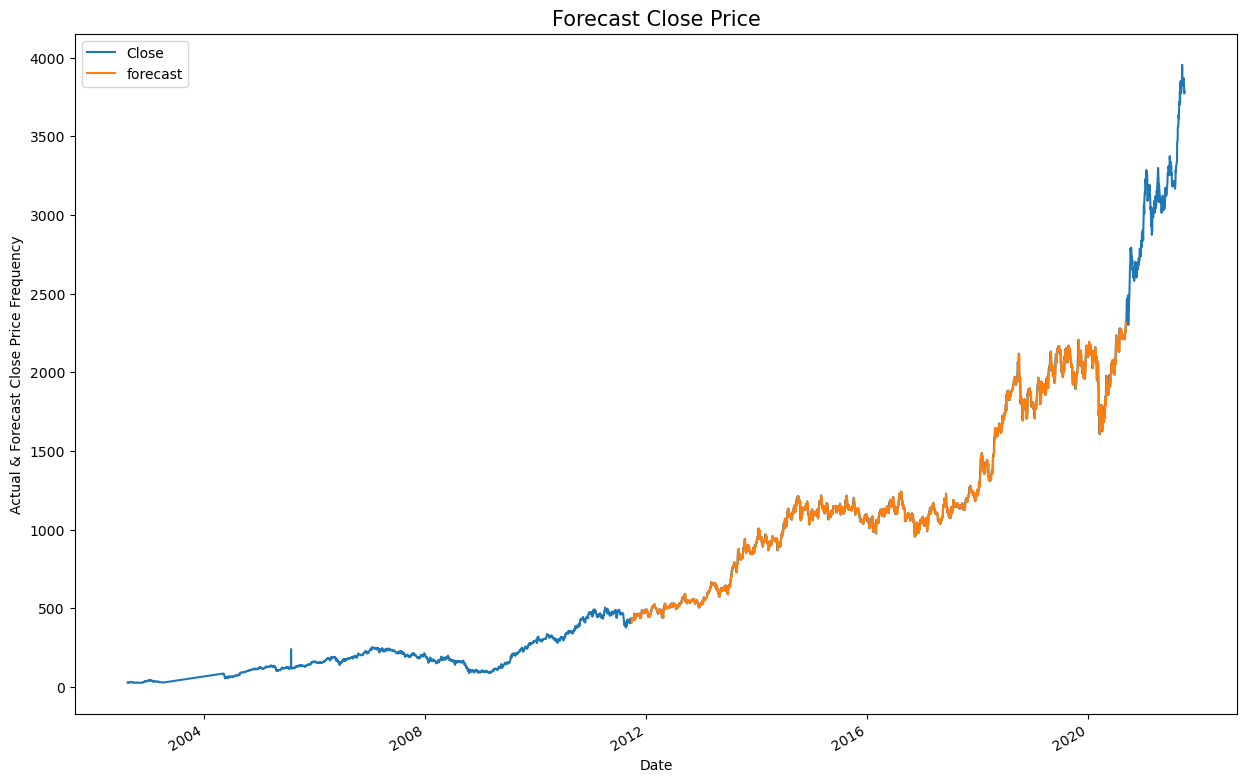

In [67]:
# Plotting forecast for few steps
forecast_data["forecast"] = model_fit.predict(start= 2000,end = 4200,dynamic = False)
forecast_data[["Close","forecast"]].plot(figsize = (15,10))
plt.title("Forecast Close Price", fontsize = 15)
plt.xlabel("Date")
plt.ylabel("Actual & Forecast Close Price Frequency")
plt.legend()
plt.show()


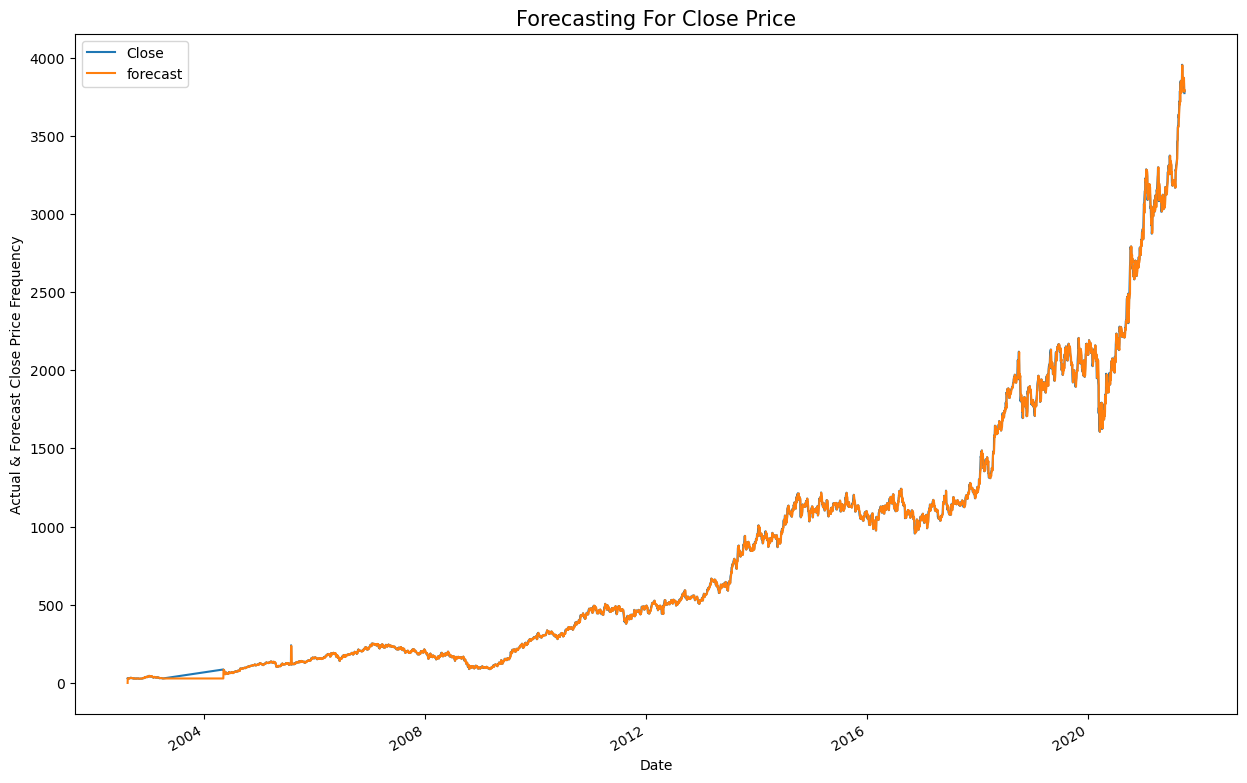

In [68]:
# Plot forecasting for whole data
forecast_data["forecast"] = model_fit.predict(start= 0,end = 4462,dynamic = False)
forecast_data[["Close","forecast"]].plot(figsize = (15,10))
plt.title("Forecasting For Close Price", fontsize = 15)
plt.xlabel("Date")
plt.ylabel("Actual & Forecast Close Price Frequency")
plt.legend()
plt.show()

In [69]:
forecast_data

,Close,Close Price First Difference,forecast
Date,,,
2002-08-12,29.519140,NaN,0.000000
2002-08-13,29.119476,-0.399664,29.518787
2002-08-14,27.111877,-2.007599,29.132721
2002-08-15,27.111877,0.000000,27.184933
2002-08-16,27.046812,-0.065065,27.139487
...,...,...,...
2021-09-24,3871.300049,2.050049,3868.892325
2021-09-27,3836.949951,-34.350098,3871.095238
2021-09-28,3779.149902,-57.800049,3838.039325


## Evaluation For Forecasting (ARIMA Model)

In [71]:
close_price = forecast_data["Close"]
forecast_close_price = forecast_data["forecast"]

In [72]:
# Evaluate root mean square error(RMSE)
# Evaluate mean square error (MSE)
# Evaluate mean absolute error (MAE)
mse = mean_squared_error(close_price, forecast_close_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(close_price, forecast_close_price)
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

RMSE: 18.904174651337488
MSE: 357.3678192482708
MAE: 10.288328815803581


- The **ADF test** showed the original close price series was **non-stationary**, but became **stationary after first differencing**.  
- The **ARIMA(1,1,1)** model was selected as the best fit for forecasting.
- ``Evaluation Metrics:``
    - **RMSE:** 18.90  
    - **MSE:** 357.37  
    - **MAE:** 10.28     
- The model captured **short-term trends accurately** and forecasted **closing prices close to actual values**.  
- Overall, the **ARIMA model performs well for time-series forecasting**, showing that **TCS stock has a predictable trend with limited volatility**.


## Summary / Insight

- TCS stock shows **strong long-term growth** with **stable performance** from 2002–2021.
  
- Highest trading volumes observed in **April, October**, and during **2005–2009.**

- Stock remains mostly stable with few days of high volatility.

- Moving average crossover highlights effective buy/sell opportunities.

- **Linear Regression** achieved **R² = 0.9994**, **indicating** an **excellent fit** for predicting closing prices.

- **ARIMA (1,1,1) model** provides **accurate short-term forecasts** with **RMSE ≈ 18.9**

- **Overall, TCS stock shows steady upward momentum high predictability, making it a reliable investment option.**

## References

> Dataset: *TCS Stock Data - Live and Latest*   
> Source: Kaggle  
> [URL of Dataset](https://www.kaggle.com/datasets/kalilurrahman/tcs-stock-data-live-and-latest?select=TCS_stock_history.csv)  
> Accessed on: October 2025  